# Customer Churn Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('Churn_Modelling.csv')

In [3]:
data=data.drop('RowNumber',axis=1)#There is no use with the RowNumber in our dataset
data

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


### Data Preprocessing

In [4]:
data.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
data.dropna(axis=1)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [7]:
data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### Data Analysis 

In [8]:
data.drop(columns=['CustomerId','Surname'],inplace=True)

In [9]:
data#modified data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


F:\sathwik\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CreditScore', ylabel='Density'>

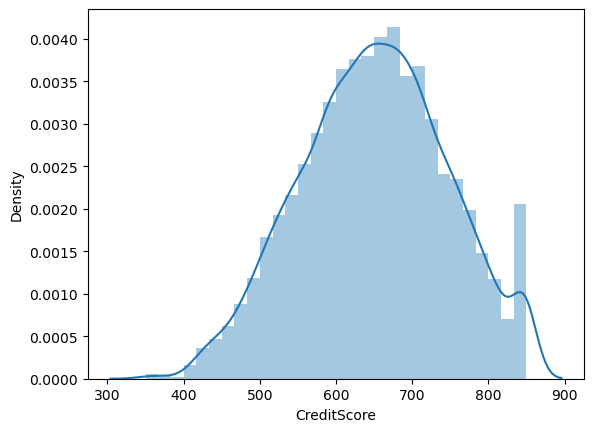

In [10]:
import seaborn as sns
sns.distplot(data['CreditScore'], bins=30)

F:\sathwik\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

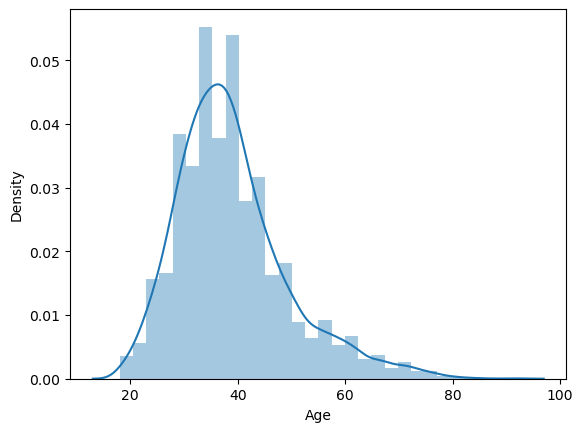

In [11]:
sns.distplot(data['Age'], bins=30)

F:\sathwik\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Tenure', ylabel='Density'>

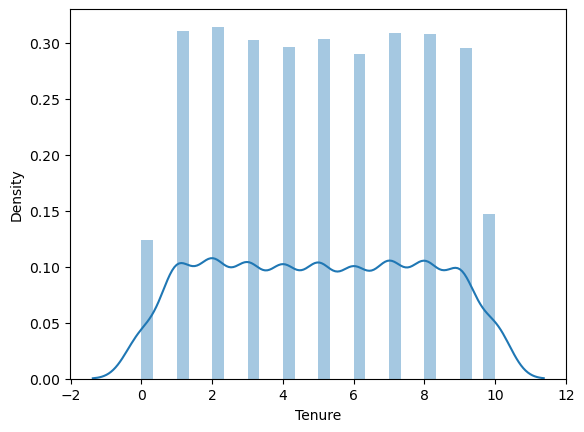

In [12]:
sns.distplot(data['Tenure'], bins=30)

F:\sathwik\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Exited', ylabel='Density'>

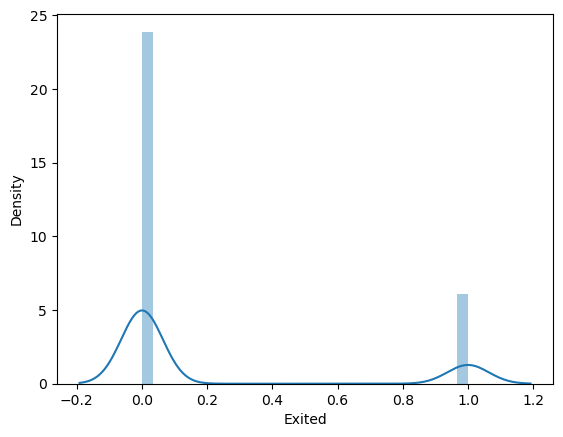

In [13]:
sns.distplot(data['Exited'], bins=30)

In [14]:
dataset = pd.get_dummies(data,columns=['Geography','Gender'],drop_first=True)

Because they are strings.I convert them into numbers by using get_dummies

In [15]:
dataset

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


Correlation Matrix

<AxesSubplot:>

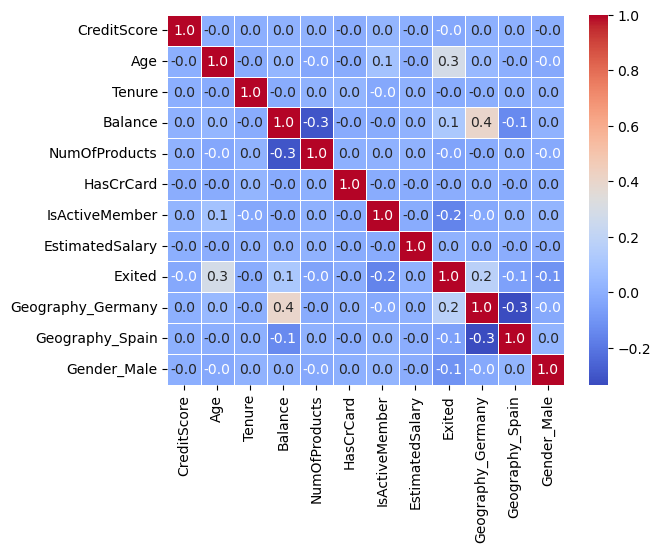

In [16]:
corr= dataset.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.50, fmt='.1f')

Scaling the dataset

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
x=dataset.drop('Exited',axis=1)
y=dataset['Exited']
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)

### Model Evaluation

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=100)

In [21]:
x_train.shape

(8000, 11)

In [22]:
x_test.shape

(2000, 11)

In [23]:
model=RandomForestClassifier()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.86

In [24]:
y_pred=model.predict(x_test)

In [25]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

<AxesSubplot:>

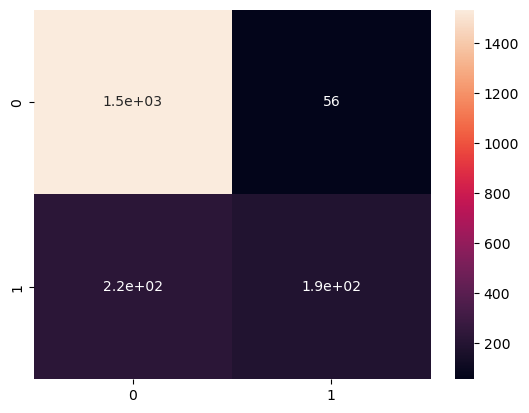

In [26]:
sns.heatmap(cm,annot=True)

## PyCaret


This model has achieved an accuracy of 85.6%. However, it's worth noting that many individuals have already developed similar models. In contrast, I am pursuing a unique approach by utilizing PyCaret, an open-source Python library meticulously designed to streamline and expedite the entire machine learning process, including model deployment.

In [27]:
from pycaret.classification import *

In [28]:
classificate=setup(data=dataset,target='Exited',session_id=12)

,Description,Value
0,Session id,12
1,Target,Exited
2,Target type,Binary
3,Original data shape,"(10000, 12)"
4,Transformed data shape,"(10000, 12)"
5,Transformed train set shape,"(7000, 12)"
6,Transformed test set shape,"(3000, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


In [29]:
best=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8649,0.8683,0.4775,0.7729,0.5897,0.5142,0.5359,1.3290
rf,Random Forest Classifier,0.8599,0.8528,0.4677,0.7498,0.5755,0.4971,0.5172,1.9660
lightgbm,Light Gradient Boosting Machine,0.8587,0.8555,0.4985,0.7227,0.5894,0.5076,0.5207,1.4010
ada,Ada Boost Classifier,0.8531,0.8467,0.4712,0.7109,0.5661,0.4821,0.4972,1.1270
et,Extra Trees Classifier,0.8529,0.8464,0.4459,0.7269,0.5519,0.4700,0.4905,1.6100
qda,Quadratic Discriminant Analysis,0.8356,0.8180,0.3864,0.6676,0.4888,0.3991,0.4207,1.3960
ridge,Ridge Classifier,0.8103,0.0000,0.1354,0.6714,0.2244,0.1679,0.2394,1.3420
lda,Linear Discriminant Analysis,0.8100,0.7694,0.2462,0.5782,0.3441,0.2541,0.2862,1.4060
dummy,Dummy Classifier,0.7963,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0980
dt,Decision Tree Classifier,0.7950,0.6949,0.5259,0.4978,0.5111,0.3816,0.3821,1.0970


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [30]:
best

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=12, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [31]:
GradientBoostingClassifier=create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8829,0.8845,0.5524,0.8144,0.6583,0.5908,0.6070
1,0.8586,0.8494,0.4825,0.7340,0.5823,0.5015,0.5175
2,0.8857,0.9074,0.5315,0.8539,0.6552,0.5911,0.6150
3,0.8500,0.8691,0.4755,0.6939,0.5643,0.4775,0.4899
4,0.8614,0.8802,0.4476,0.7805,0.5689,0.4935,0.5206
5,0.8529,0.8309,0.4476,0.7273,0.5541,0.4719,0.4919
6,0.8671,0.8677,0.4859,0.7753,0.5974,0.5228,0.5433
7,0.8643,0.8857,0.4507,0.7901,0.5740,0.5004,0.5283
8,0.8557,0.8456,0.4225,0.7595,0.5430,0.4655,0.4937


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [32]:
tune=tune_model(GradientBoostingClassifier)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8757,0.8824,0.5664,0.7642,0.6506,0.5770,0.5866
1,0.8571,0.8405,0.4895,0.7216,0.5833,0.5009,0.5147
2,0.8829,0.8965,0.5594,0.8081,0.6612,0.5932,0.6078
3,0.8457,0.8632,0.5175,0.6549,0.5781,0.4853,0.4903
4,0.8629,0.8678,0.4895,0.7527,0.5932,0.5152,0.5324
5,0.8471,0.8118,0.4545,0.6915,0.5485,0.4612,0.4759
6,0.8543,0.8595,0.5000,0.6961,0.5820,0.4966,0.5066
7,0.8529,0.8575,0.4366,0.7294,0.5463,0.4650,0.4868
8,0.8486,0.8338,0.4859,0.6765,0.5656,0.4768,0.4864


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [33]:
GBC_bagged=ensemble_model(GradientBoostingClassifier,method='Bagging')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8857,0.8863,0.5594,0.8247,0.6667,0.6007,0.6172
1,0.8543,0.8477,0.4685,0.7204,0.5678,0.4849,0.5011
2,0.8843,0.9085,0.5175,0.8605,0.6463,0.5822,0.6091
3,0.8514,0.8722,0.4545,0.7143,0.5556,0.4716,0.4890
4,0.8514,0.8830,0.4266,0.7349,0.5398,0.4586,0.4827
5,0.8529,0.8218,0.4476,0.7273,0.5541,0.4719,0.4919
6,0.8614,0.8682,0.4577,0.7647,0.5727,0.4961,0.5194
7,0.8586,0.8847,0.4225,0.7792,0.5479,0.4727,0.5039
8,0.8543,0.8422,0.4296,0.7439,0.5446,0.4652,0.4901


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [34]:
GBC_boosted=ensemble_model(GradientBoostingClassifier,method='Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8743,0.8627,0.5734,0.7523,0.6508,0.5758,0.5837
1,0.8457,0.8324,0.4825,0.6699,0.5610,0.4704,0.4797
2,0.8729,0.8616,0.5105,0.7935,0.6213,0.5492,0.5685
3,0.8400,0.8380,0.4895,0.6422,0.5556,0.4602,0.4665
4,0.8629,0.8569,0.5035,0.7423,0.6000,0.5209,0.5352
5,0.8400,0.8039,0.4406,0.6632,0.5294,0.4377,0.4510
6,0.8614,0.8445,0.5000,0.7320,0.5941,0.5141,0.5277
7,0.8514,0.8271,0.4437,0.7159,0.5478,0.4647,0.4838
8,0.8514,0.8268,0.4577,0.7065,0.5556,0.4712,0.4872


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

I am going to plot all in one as showing below by using Pycaret

In [35]:
evaluate_model(GradientBoostingClassifier)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

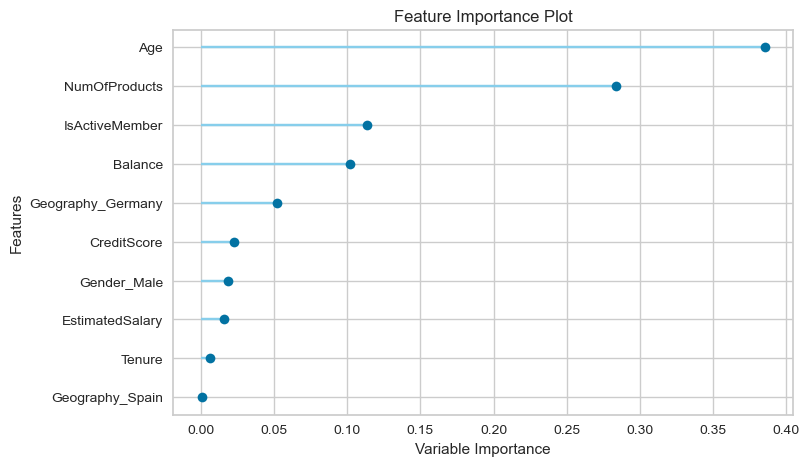

In [36]:
plot_model(GradientBoostingClassifier,plot="feature")

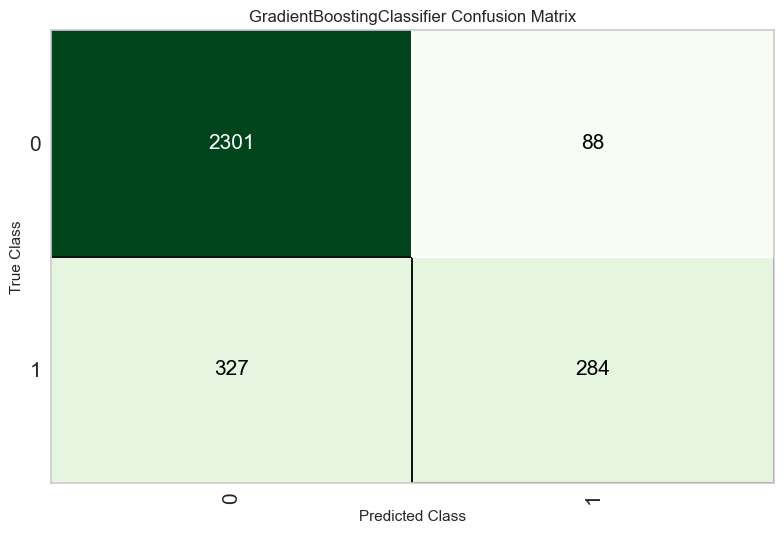

In [37]:
plot_model(GradientBoostingClassifier, plot="confusion_matrix")

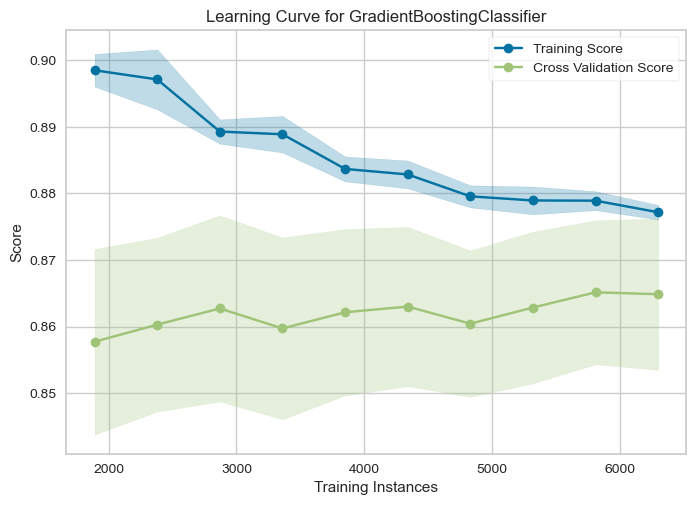

In [38]:
plot_model(GradientBoostingClassifier, plot="learning")

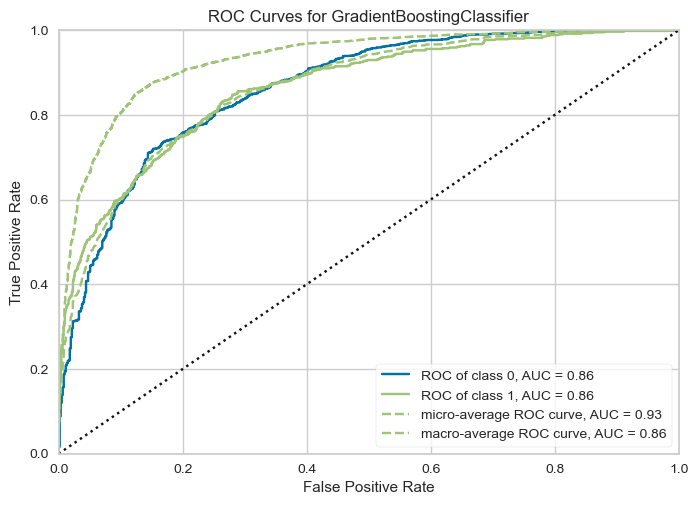

In [39]:
plot_model(GradientBoostingClassifier, plot="auc")

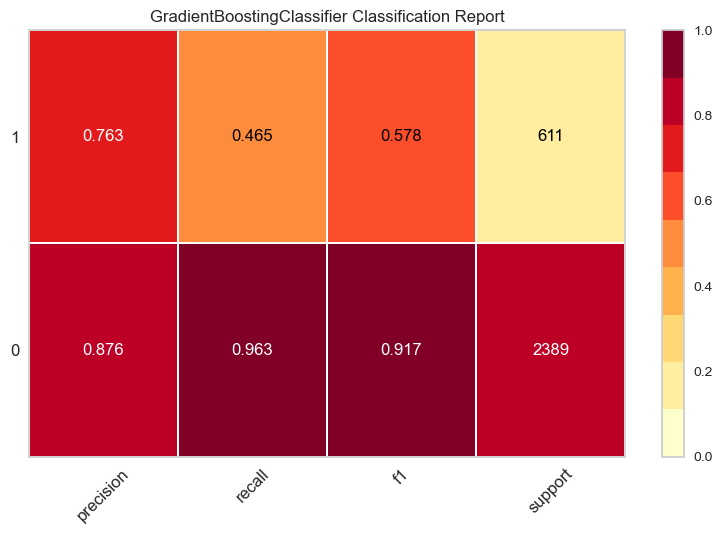

In [40]:
plot_model(GradientBoostingClassifier, plot="class_report")